In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tennis-weather/tennis.csv


In [2]:
df=pd.read_csv("../input/tennis-weather/tennis.csv")

In [3]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
df['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [5]:
df_dum=pd.get_dummies(data=df,columns=['temp','outlook','humidity','windy'])

In [6]:
df_dum.head()

,play,temp_cool,temp_hot,temp_mild,outlook_overcast,outlook_rainy,outlook_sunny,humidity_high,humidity_normal,windy_False,windy_True
0,no,0,1,0,0,0,1,1,0,1,0
1,no,0,1,0,0,0,1,1,0,0,1
2,yes,0,1,0,1,0,0,1,0,1,0
3,yes,0,0,1,0,1,0,1,0,1,0
4,yes,1,0,0,0,1,0,0,1,1,0


In [7]:
x=df_dum.drop('play',axis=1)
y=df_dum['play']

# Train test split

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=22)

# Decision tree classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=3)
model.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=3)

In [10]:
ypred=model.predict(xtest)

# Visualizing decision tree

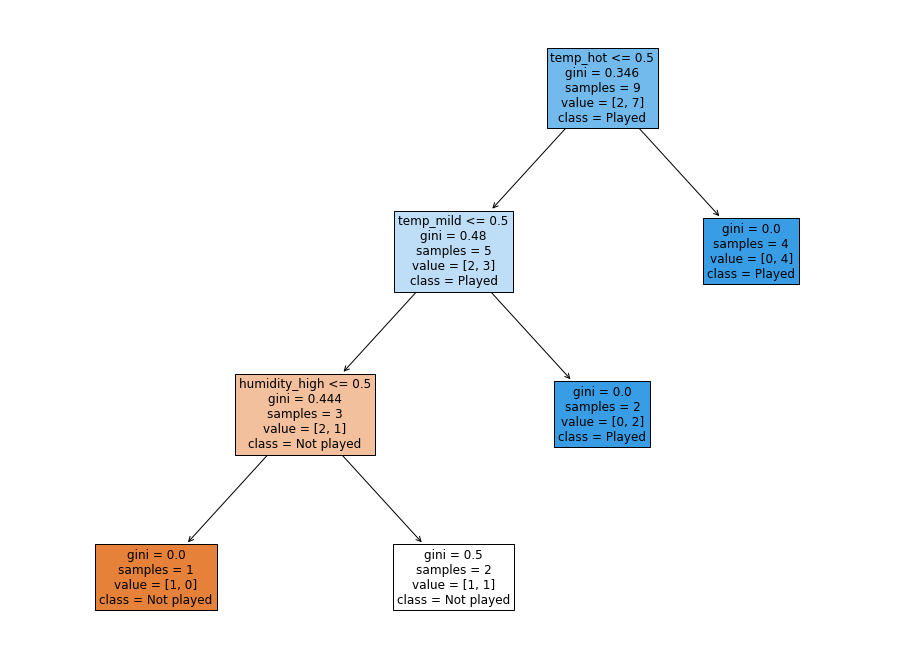

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,12))
a=plot_tree(model,feature_names=df_dum.columns,fontsize=12,filled=True,class_names=['Not played','Played'])